Code from Statistics for Machine Learning Techniques for exploring supervised, unsupervised, and reinforcement learning models with Python and R by Pratap Dangeti, modified.

* Added correlation matrix using Seaborn
* Added OLS backward elimination
* Added mse metrics and charts to compare different levels of regularization

Rodolfo

In [1]:
import numpy as np  
import pandas as pd      
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score, mean_squared_error
from sklearn.model_selection import train_test_split   

import matplotlib.pyplot as plt

import statsmodels.api as sm
import seaborn as sns

https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

### Train & Test split

In [2]:
original_data = pd.read_csv("mtcars.csv")     

train_data,test_data = train_test_split(original_data,train_size = 0.7,random_state=42)


### Linear Regressiom vs. Gradient Descent       

In [3]:
train_data = pd.read_csv("mtcars.csv")                       
                        
X = np.array(train_data["hp"])  ; y = np.array(train_data["mpg"]) 
X = X.reshape(32,1); y = y.reshape(32,1)

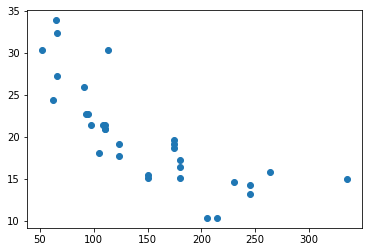

In [4]:
plt.scatter(X,y)
plt.show()

In [5]:
model = LinearRegression(fit_intercept = True) 
 
model.fit(X,y)       
print ("Linear Regression Results")        
print ("Intercept",model.intercept_[0] ,"Coefficient",model.coef_[0])  

Linear Regression Results
Intercept 30.098860539622496 Coefficient [-0.06822828]


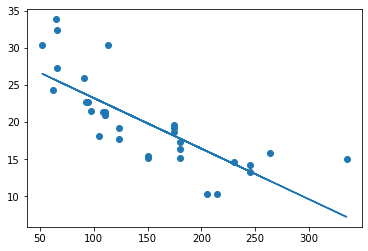

In [6]:
y_pred = model.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred)
plt.show()

In [7]:
def gradient_descent(x, y,learn_rate, conv_threshold,batch_size,max_iter):    
    converged = False
    iter = 0
    m = batch_size 
 
    t0 = np.random.random(x.shape[1])
    t1 = np.random.random(x.shape[1])

    MSE = (sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])/ m)    

    while not converged:        
        grad0 = 1.0/m * sum([(t0 + t1*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])

        temp0 = t0 - learn_rate * grad0
        temp1 = t1 - learn_rate * grad1
    
        t0 = temp0
        t1 = temp1

        MSE_New = (sum( [ (t0 + t1*x[i] - y[i])**2 for i in range(m)] ) / m)

        if abs(MSE - MSE_New ) <= conv_threshold:
            print ('Converged, iterations: ', iter)
            converged = True
    
        MSE = MSE_New   
        iter += 1 
    
        if iter == max_iter:
            print ('Max interactions reached')
            converged = True

    return t0,t1

In [8]:
if __name__ == '__main__':
    Inter, Coeff = gradient_descent(x = X,y = y,learn_rate=0.00003 ,conv_threshold=1e-8, batch_size=32,max_iter=1500000)
    print ("Gradient Descent Results")
    print (('Intercept = %s Coefficient = %s') %(Inter, Coeff)) 

Converged, iterations:  1143140
Gradient Descent Results
Intercept = [30.02495131] Coefficient = [-0.06781243]


# Linear Regression

In [8]:
wine_quality = pd.read_csv("winequality-red.csv",sep=';')  
# Step for converting white space in columns to _ value for better handling 

In [9]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Step for converting white space in columns to _ value for better handling 

In [10]:
wine_quality.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [11]:
wine_quality.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Simple Linear Regression - chart

In [12]:
model = sm.OLS(wine_quality['quality'],sm.add_constant(wine_quality['alcohol'])).fit()
 
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           2.83e-91
Time:                        14:13:54   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8750      0.175     10.732      0.0

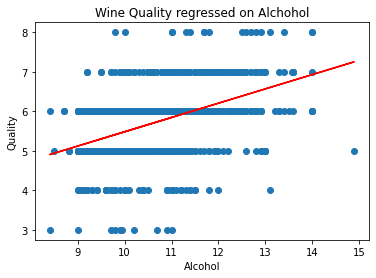

In [13]:
plt.scatter(wine_quality['alcohol'],wine_quality['quality'],label = 'Actual Data')
plt.plot(wine_quality['alcohol'],model.params[0]+model.params[1]*wine_quality['alcohol'],
         c ='r',label="Regression fit")
plt.title('Wine Quality regressed on Alchohol')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

### Simple Linear Regression - Model fit

In [14]:
x_train,x_test,y_train,y_test = train_test_split(wine_quality['alcohol'],wine_quality["quality"],train_size = 0.7,random_state=42)

In [15]:
type(x_train)

pandas.core.series.Series

##### Convert to a df

In [16]:
x_train = pd.DataFrame(x_train);
x_test = pd.DataFrame(x_test)
y_train = pd.DataFrame(y_train);
y_test = pd.DataFrame(y_test)

In [17]:
type(x_train)

pandas.core.frame.DataFrame

In [18]:
def mean(values):
    return round(sum(values)/float(len(values)),2)

In [19]:
alcohol_mean = mean(x_train['alcohol'])
quality_mean = mean(y_train['quality'])
print("alcohol_mean=",alcohol_mean)
print("quality_mean",quality_mean)

alcohol_mean= 10.42
quality_mean 5.62


You could have used the built-in functionality 


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html

In [20]:
alcohol_mean = round(x_train['alcohol'].mean(),2)
quality_mean = round(y_train['quality'].mean(),2)
print("alcohol_mean=",alcohol_mean)
print("quality_mean",quality_mean)

alcohol_mean= 10.42
quality_mean 5.62


Technically this is a sum of squares.  It is using it later to calculate the coefficients as a ratio so the number of observations will cancel each other.

In [21]:
alcohol_variance = round(sum((x_train['alcohol'] - alcohol_mean)**2),2)
quality_variance = round(sum((y_train['quality'] - quality_mean)**2),2)
print("alcohol_variance=",alcohol_variance)
print("quality_variance",quality_variance)

alcohol_variance= 1255.6
quality_variance 737.1


In [22]:
alcohol_variance = round(x_train['alcohol'].var(ddof=0)*len(x_train['alcohol']),2)
quality_variance = round(y_train['quality'].var(ddof=0)*len(y_train['quality']),2)
print("alcohol_variance=",alcohol_variance)
print("quality_variance",quality_variance)

alcohol_variance= 1255.6
quality_variance 737.1


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cov.html

In [23]:
covariance=round(pd.concat([x_train,y_train],axis=1, join='inner').cov().loc["alcohol"][1]*len(x_train),2)
covariance

473.77

#### Show covariance matrix and why it was sliced as it was

In [24]:
print("Covariance Matrix")
print ("\n \n",pd.concat([x_train,y_train],axis=1, join='inner').cov())

print("")
print("x_train variance = ",x_train.var())
print("")

print("y_train variance =", y_train.var())



Covariance Matrix

 
           alcohol   quality
alcohol  1.123073  0.423390
quality  0.423390  0.659302

x_train variance =  alcohol    1.123073
dtype: float64

y_train variance = quality    0.659302
dtype: float64


In [25]:
covariance = round(sum((x_train['alcohol'] - alcohol_mean) * (y_train['quality'] - quality_mean )),2)
print("covariance =",covariance)

covariance = 473.34


In [26]:
b1 = covariance/alcohol_variance
b0 = quality_mean - b1*alcohol_mean
print ("\n\nIntercept (B0):",round(b0,4),"Co-efficient (B1):",round(b1,4))
y_test["y_pred"] = pd.DataFrame(b0+b1*x_test['alcohol'])
R_sqrd = 1- ( sum((y_test['quality']-y_test['y_pred'])**2) / sum((y_test['quality'] - mean(y_test['quality']))**2 ))
print ("Test R-squared value:",round(R_sqrd,4))



Intercept (B0): 1.6918 Co-efficient (B1): 0.377
Test R-squared value: 0.185


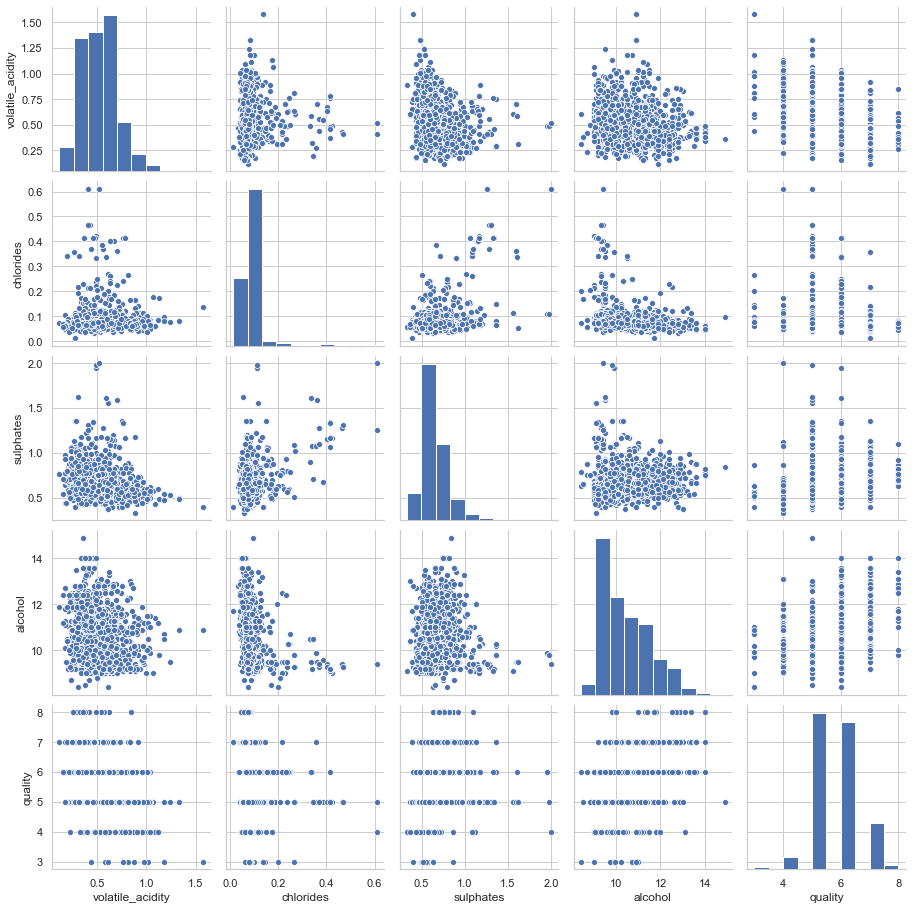

In [27]:
# Plots - pair plots
eda_colnms = [ 'volatile_acidity',  'chlorides', 'sulphates', 'alcohol','quality']
sns.set(style='whitegrid',context = 'notebook')
sns.pairplot(wine_quality[eda_colnms],height = 2.5,x_vars= eda_colnms,y_vars=eda_colnms)
plt.show()


help(x_train.cov())

# Multi linear regression model

In [141]:
colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[colnms]
pdy = wine_quality["quality"]

print("wine_quality type= ", type(wine_quality))
print("pdx type= ", type(pdx))
print("pdy type= ", type(pdy))

wine_quality type=  <class 'pandas.core.frame.DataFrame'>
pdx type=  <class 'pandas.core.frame.DataFrame'>
pdy type=  <class 'pandas.core.series.Series'>


In [142]:
pdx.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [143]:
pdy.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [144]:
x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)

#random.seed(434)
full_mod = sm.OLS(y_train,x_train_new)
full_res = full_mod.fit()
print ("\n \n",full_res.summary())


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     56.90
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          8.34e-100
Time:                        14:47:14   Log-Likelihood:                -1103.5
No. Observations:                1119   AIC:                             2231.
Df Residuals:                    1107   BIC:                             2291.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   17.9

In [145]:
y_pred_new = full_res.predict(x_test_new)
mse_OLS_all_variables = mean_squared_error(y_test, y_pred_new)
print("mse_OLS_all_variables:",round(mse_OLS_all_variables,4))

mse_OLS_all_variables: 0.4112


If VIF <= 4 suggests no multi-collinearity, in banking scenarios, people use VIF <= 2 also!

In [146]:
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
fixed_acidity 7.189
volatile_acidity 1.824
citric_acid 3.139
residual_sugar 1.742
chlorides 1.463
free_sulfur_dioxide 1.973
total_sulfur_dioxide 2.205
density 5.902
pH 3.224
sulphates 1.428
alcohol 2.93


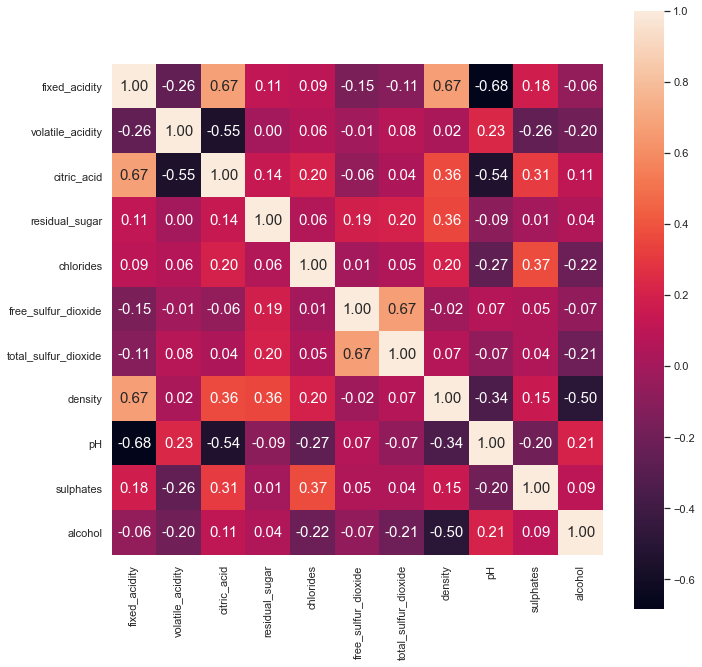

In [33]:
# Correlation coefficients
corr_mat = np.corrcoef(wine_quality[colnms].values.T)
sns.set(font_scale=1)
sns.set(rc={"figure.figsize":(11, 11)})
full_mat = sns.heatmap(corr_mat, cbar=True, annot=True, square=True,
fmt='.2f',annot_kws={'size': 15}, yticklabels=colnms,
xticklabels=colnms)
plt.show()

#  Backward Elimination

In [128]:
colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


for i in np.arange(len(colnms)):
    pdx = wine_quality[colnms]
    pdy = wine_quality["quality"]

    x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
    x_train_new = sm.add_constant(x_train)
    x_test_new = sm.add_constant(x_test)

    #random.seed(434)
    full_mod = sm.OLS(y_train,x_train_new)
    full_res = full_mod.fit()
    
    y_pred_new = full_res.predict(x_test_new)
    mse_full_res = mean_squared_error(y_test, y_pred_new)
    

    if np.amax(full_res.pvalues) > 0.05:
        pop_par = full_res.pvalues.keys()[np.where(full_res.pvalues.values == np.amax(full_res.pvalues.values))[0][0]]
        print("\n","Step:",i+1,"Coefficient Removed:",pop_par,"p-value:",np.amax(full_res.pvalues),"mse:",mse_full_res)
        colnms.pop(np.where(full_res.pvalues.values == np.amax(full_res.pvalues.values))[0][0]-1)
    else:
        break


 Step: 1 Coefficient Removed: residual_sugar p-value: 0.6679058094072442 mse: 0.4112348717504305

 Step: 2 Coefficient Removed: density p-value: 0.7134833386084574 mse: 0.4117854658657121

 Step: 3 Coefficient Removed: fixed_acidity p-value: 0.5860831372572004 mse: 0.41166952429397785

 Step: 4 Coefficient Removed: citric_acid p-value: 0.18468297503817235 mse: 0.41175894332820645


In [129]:
print ("\n \n",full_res.summary())


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     89.21
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          4.31e-103
Time:                        14:43:45   Log-Likelihood:                -1104.7
No. Observations:                1119   AIC:                             2225.
Df Residuals:                    1111   BIC:                             2266.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.9

If VIF <= 4 suggests no multi-collinearity, in banking scenarios, people use VIF <= 2 also!

In [36]:
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
volatile_acidity 1.243
chlorides 1.317
free_sulfur_dioxide 1.878
total_sulfur_dioxide 1.956
pH 1.236
sulphates 1.322
alcohol 1.225


In [37]:
#mean_squared_error
print ("\nTest MSE value:",round(mse_full_res,4))


Test MSE value: 0.4109


# Ridge Regression

In [88]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]


In [89]:
x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)

alphas = [1e-4,1e-3,1e-2,0.1,0.5,1.0,5.0,10.0]

initrsq = [0]
ridge_alpha=[]
ridge_test_rsq=[]

print ("\nRidge Regression: Best Parameters\n")
for alph in alphas:
    ridge_reg = Ridge(alpha=alph) 
    ridge_reg.fit(x_train,y_train)    
    tr_rsqrd = ridge_reg.score(x_train,y_train)
    ts_rsqrd = ridge_reg.score(x_test,y_test)    
    #print("alpha",alph,"   test R2",ts_rsqrd)
    ridge_alpha.append(alph)
    ridge_test_rsq.append(ts_rsqrd)

    if ts_rsqrd > initrsq:
        print ("Lambda: ",alph,"Train R-Squared value:",round(tr_rsqrd,5),"Test R-squared value:",round(ts_rsqrd,5))
        initrsq = ts_rsqrd
        best_alpha = alph#


Ridge Regression: Best Parameters

Lambda:  0.0001 Train R-Squared value: 0.3612 Test R-squared value: 0.35135


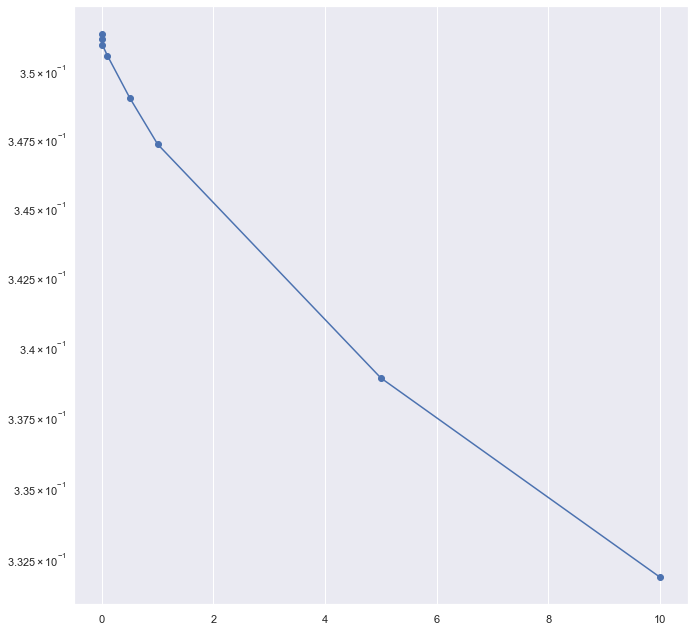

In [90]:
plt.scatter(ridge_alpha,ridge_test_rsq)
plt.plot(ridge_alpha,ridge_test_rsq)
plt.semilogy(basey=10)
plt.show()

In [91]:
# Coeffients of Ridge regression of best alpha value
ridge_reg = Ridge(alpha=0.0001) 
ridge_reg.fit(x_train,y_train) 

Ridge(alpha=0.0001)

In [92]:
print ("\nRidge Regression coefficient values of Alpha = 0.0001\n")
for i in range(11):
    print (all_colnms[i],": ",ridge_reg.coef_[i])


Ridge Regression coefficient values of Alpha = 0.0001

fixed_acidity :  0.021706419837042322
volatile_acidity :  -1.1008284693320933
citric_acid :  -0.248062597575892
residual_sugar :  0.0069148133496597375
chlorides :  -1.6761006270268608
free_sulfur_dioxide :  0.004569569942035622
total_sulfur_dioxide :  -0.0032683124360634286
density :  -12.319698749402557
pH :  -0.3288303326020798
sulphates :  0.810203601116154
alcohol :  0.2937449016612568


In [93]:
ridge_y_test_pred=ridge_reg.predict(x_test)

# R-square calculation
rsqd = r2_score(y_test, ridge_y_test_pred)
print ("\nTest R-squared value:",round(rsqd,4))

#mean_squared_error
mse = mean_squared_error(y_test, ridge_y_test_pred)
print ("\nTest MSE value:",round(mse,4))


Test R-squared value: 0.3513

Test MSE value: 0.4113


# Lasso Regression

In [94]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)

alphas = [1e-4,1e-3,1e-2,0.1,0.5,1.0,5.0,10.0]
initrsq = 0
print ("\nLasso Regression: Best Parameters\n")

for alph in alphas:
    lasso_reg = Lasso(alpha=alph) 
    lasso_reg.fit(x_train,y_train)    
    tr_rsqrd = lasso_reg.score(x_train,y_train)
    ts_rsqrd = lasso_reg.score(x_test,y_test)    

    if ts_rsqrd > initrsq:
        print ("Lambda: ",alph,"Train R-Squared value:",round(tr_rsqrd,5),"Test R-squared value:",round(ts_rsqrd,5))
        initrsq = ts_rsqrd



Lasso Regression: Best Parameters

Lambda:  0.0001 Train R-Squared value: 0.36101 Test R-squared value: 0.35057


In [95]:
# Coeffients of Lasso regression of best alpha value
lasso_reg = Lasso(alpha=0.0001) 
lasso_reg.fit(x_train,y_train) 

Lasso(alpha=0.0001)

In [96]:
print ("\nLasso Regression coefficient values of Alpha = 0.001\n")
for i in range(11):
    print (all_colnms[i],": ",lasso_reg.coef_[i])



Lasso Regression coefficient values of Alpha = 0.001

fixed_acidity :  0.010764992884512867
volatile_acidity :  -1.1066868720526872
citric_acid :  -0.24278897146534797
residual_sugar :  0.001350800261004123
chlorides :  -1.6293109622669941
free_sulfur_dioxide :  0.004707973257557177
total_sulfur_dioxide :  -0.0032933135960907687
density :  -0.0
pH :  -0.37702155090354456
sulphates :  0.7835132693523057
alcohol :  0.30528336209925017


In [97]:
lasso_y_test_pred=lasso_reg.predict(x_test)

# R-square calculation
rsqd = r2_score(y_test, lasso_y_test_pred)
print ("\nTest R-squared value:",round(rsqd,4))

#mean_squared_error
mse = mean_squared_error(y_test, lasso_y_test_pred)
print ("\nTest MSE value:",round(mse,4))


Test R-squared value: 0.3506

Test MSE value: 0.4118


#  Comparison

In [98]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

In [99]:
type(x_train)

pandas.core.frame.DataFrame

In [100]:
alphas = [1e-4,1e-3,1e-2,0.1,0.5,1.0,5.0,10,20]
initrsq = 0

lasso_mse_train = []
lasso_mse_test = []

ridge_mse_train = []
ridge_mse_test = []

for alph in alphas:
        lasso_reg = Lasso(alpha=alph) 
        lasso_reg.fit(x_train,y_train) 

        lasso_y_train_pred = lasso_reg.predict(x_train)
        lasso_y_test_pred = lasso_reg.predict(x_test)

        ridge_reg = Ridge(alpha=alph)
        ridge_reg.fit(x_train,y_train) 

        ridge_y_train_pred = ridge_reg.predict(x_train)
        ridge_y_test_pred = ridge_reg.predict(x_test)

        #Calculate quality of predictors

        tr_lasso_mse = mean_squared_error(y_train, lasso_y_train_pred)
        ts_lasso_mse = mean_squared_error(y_test, lasso_y_test_pred)

        tr_ridge_mse = mean_squared_error(y_train, ridge_y_train_pred)
        ts_ridge_mse = mean_squared_error(y_test, ridge_y_test_pred)

        #append quality metrics

        lasso_mse_train.append(tr_lasso_mse)
        lasso_mse_test.append(ts_lasso_mse)

        ridge_mse_train.append(tr_ridge_mse)
        ridge_mse_test.append(ts_ridge_mse)

    



In [101]:
zipped = list(zip(alphas, lasso_mse_train,lasso_mse_test,ridge_mse_train,ridge_mse_test))
df = pd.DataFrame(zipped, columns=['lambda', 'lasso_mse_train','lasso_mse_test','ridge_mse_train','ridge_mse_test'])
print(df)

    lambda  lasso_mse_train  lasso_mse_test  ridge_mse_train  ridge_mse_test
0   0.0001         0.420912        0.411756         0.420789        0.411262
1   0.0010         0.421843        0.414443         0.420830        0.411390
2   0.0100         0.433429        0.432568         0.420889        0.411529
3   0.1000         0.495599        0.501589         0.420915        0.411780
4   0.5000         0.631293        0.622766         0.421142        0.412763
5   1.0000         0.632861        0.622837         0.421562        0.413838
6   5.0000         0.654870        0.633549         0.424683        0.419178
7  10.0000         0.658712        0.636211         0.427847        0.423626
8  20.0000         0.658712        0.636211         0.433126        0.430494


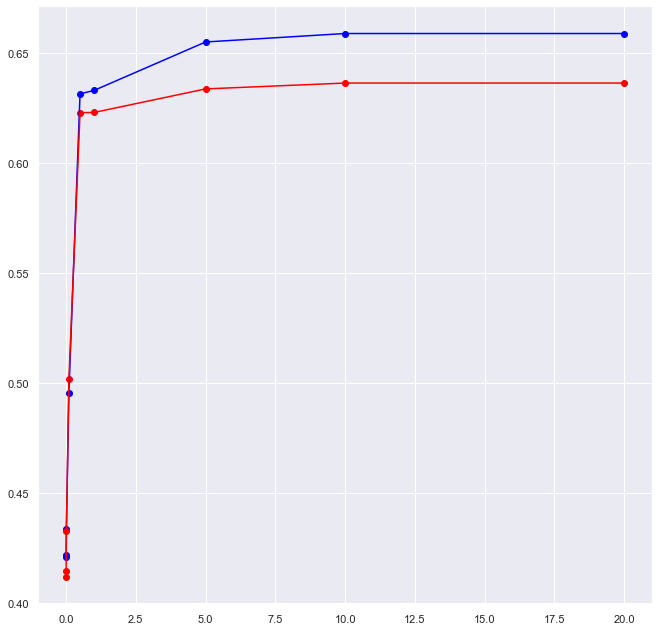

In [102]:
plt.plot(alphas,lasso_mse_train,color='blue')
plt.scatter(alphas,lasso_mse_train,color='blue')
plt.plot(alphas,lasso_mse_test,color='red')
plt.scatter(alphas,lasso_mse_test,color='red')
plt.show()

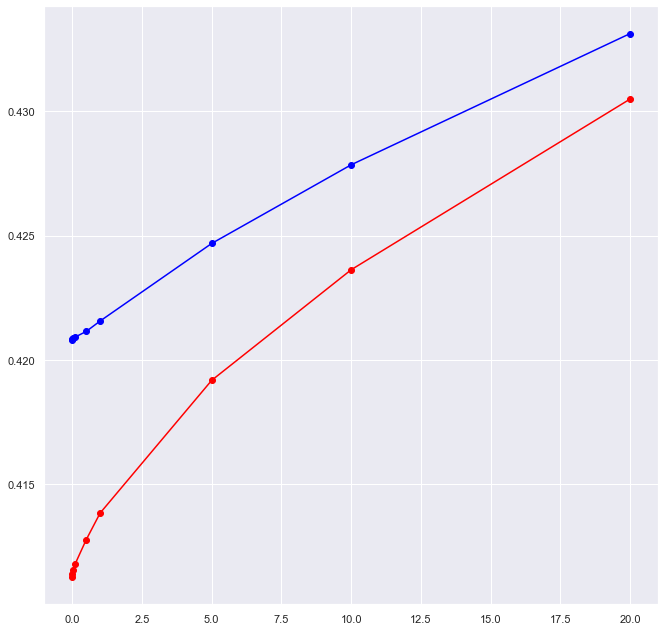

In [103]:
plt.plot(alphas,ridge_mse_train,color='blue')
plt.scatter(alphas,ridge_mse_train,color='blue')
plt.plot(alphas,ridge_mse_test,color='red')
plt.scatter(alphas,ridge_mse_test,color='red')
plt.show()

## Which model would you choose?

In [149]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

# Coeffients of Lasso regression
lasso_reg = Lasso(alpha=1e-2) 
lasso_reg.fit(x_train,y_train) 

lasso_y_test_pred = lasso_reg.predict(x_test)

print ("\nLasso Regression coefficient values of Alpha = 0.001\n")
for i in range(11):
    print (all_colnms[i],": ",lasso_reg.coef_[i])
    
print("\n \n mse =", round(mean_squared_error(y_test, lasso_y_test_pred),4))


Lasso Regression coefficient values of Alpha = 0.001

fixed_acidity :  0.023434968260833498
volatile_acidity :  -0.8412843920951032
citric_acid :  0.0
residual_sugar :  -0.001062521668049099
chlorides :  -0.0
free_sulfur_dioxide :  0.005727556599219317
total_sulfur_dioxide :  -0.0033947474430938564
density :  -0.0
pH :  -0.0
sulphates :  0.31582643274427913
alcohol :  0.3144238379028483

 
 mse = 0.4326


In [138]:
all_colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
 'pH', 'sulphates', 'alcohol']


pdx = wine_quality[all_colnms]
pdy = wine_quality["quality"]

x_train,x_test,y_train,y_test = train_test_split(pdx,pdy,train_size = 0.7,random_state=42)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

# Coeffients of Lasso regression
ridge_reg = Ridge(alpha=1e-2) 
ridge_reg.fit(x_train,y_train) 

ridge_y_test_pred = ridge_reg.predict(x_test)

print ("\nRidge Regression coefficient values of Alpha = 0.001\n")
for i in range(11):
    print (all_colnms[i],": ",ridge_reg.coef_[0][i])
    
print("\n \n mse =", round(mean_squared_error(y_test, ridge_y_test_pred),4))


Ridge Regression coefficient values of Alpha = 0.001

fixed_acidity :  0.01125641271101555
volatile_acidity :  -1.1083483481983993
citric_acid :  -0.24965312810506313
residual_sugar :  0.0019835153848390976
chlorides :  -1.6819878718206998
free_sulfur_dioxide :  0.00468340585374405
total_sulfur_dioxide :  -0.0032931297611221953
density :  -0.8622718319750973
pH :  -0.38509455899037215
sulphates :  0.7934520231560247
alcohol :  0.30429811625734404

 
 mse = 0.4115


In [139]:
print("OLS backward elimination parameters\n\n",full_res.params,"\n\n MSE = ",round(mse_full_res,4))

OLS backward elimination parameters

 const                   3.921050
volatile_acidity       -0.994130
chlorides              -1.879998
free_sulfur_dioxide     0.005395
total_sulfur_dioxide   -0.003627
pH                     -0.346926
sulphates               0.787194
alcohol                 0.298680
dtype: float64 

 MSE =  0.4109


In [147]:
print("mse_OLS_all_variables:",round(mse_OLS_all_variables,4))

mse_OLS_all_variables: 0.4112
